# Tugas 4

In [1]:
#  mengimpor library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                            AdaBoostClassifier, GradientBoostingClassifier

plt.rcParams['figure.figsize'] = (10, 7)

In [6]:
# membaca data

df  = pd.read_csv ("D://Analisis Data Eksploratif A//heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# menampilkan informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Missing Value

In [8]:
# untuk mengetahui jumlah missing value
np.sum(df.isnull())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
import pandas as pd
import numpy as np

# mendefinisikan jumlah data dummy 
num_samples = 100

# Buat data dummy
data = {
    "Age": np.random.randint(29, 75, size=num_samples),
    "Sex": np.random.choice(['M', 'F'], size=num_samples),
    "ChestPainType": np.random.choice(['ATA', 'NAP', 'ASY', 'TA'], size=num_samples),
    "RestingBP": np.random.randint(90, 200, size=num_samples),
    "Cholesterol": np.random.randint(100, 600, size=num_samples),
    "FastingBS": np.random.randint(0, 2, size=num_samples),
    "RestingECG": np.random.choice(['Normal', 'ST', 'LVH'], size=num_samples),
    "MaxHR": np.random.randint(60, 200, size=num_samples),
    "ExerciseAngina": np.random.choice(['Y', 'N'], size=num_samples),
    "Oldpeak": np.random.uniform(0, 6, size=num_samples),
    "ST_Slope": np.random.choice(['Up', 'Flat', 'Down'], size=num_samples),
    "HeartDisease": np.random.randint(0, 2, size=num_samples)
}

# Buat DataFrame
df = pd.DataFrame(data)

# Simpan ke file CSV
df.to_csv('dummy_heart_data.csv', index=False)

print("Dummy data telah dibuat dan disimpan sebagai 'dummy_heart_data.csv'")

Dummy data telah dibuat dan disimpan sebagai 'dummy_heart_data.csv'


In [13]:
df  = pd.read_csv ("dummy_heart_data.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,74,F,ASY,198,343,0,LVH,176,N,1.543055,Down,1
1,74,F,TA,97,242,0,ST,154,N,5.057101,Flat,1
2,48,M,ATA,168,405,0,Normal,186,Y,2.339042,Up,0
3,30,M,NAP,102,528,0,LVH,146,Y,3.199659,Up,0
4,51,F,ASY,103,470,1,LVH,144,N,1.520063,Down,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             100 non-null    int64  
 1   Sex             100 non-null    object 
 2   ChestPainType   100 non-null    object 
 3   RestingBP       100 non-null    int64  
 4   Cholesterol     100 non-null    int64  
 5   FastingBS       100 non-null    int64  
 6   RestingECG      100 non-null    object 
 7   MaxHR           100 non-null    int64  
 8   ExerciseAngina  100 non-null    object 
 9   Oldpeak         100 non-null    float64
 10  ST_Slope        100 non-null    object 
 11  HeartDisease    100 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ KB


# Outlier

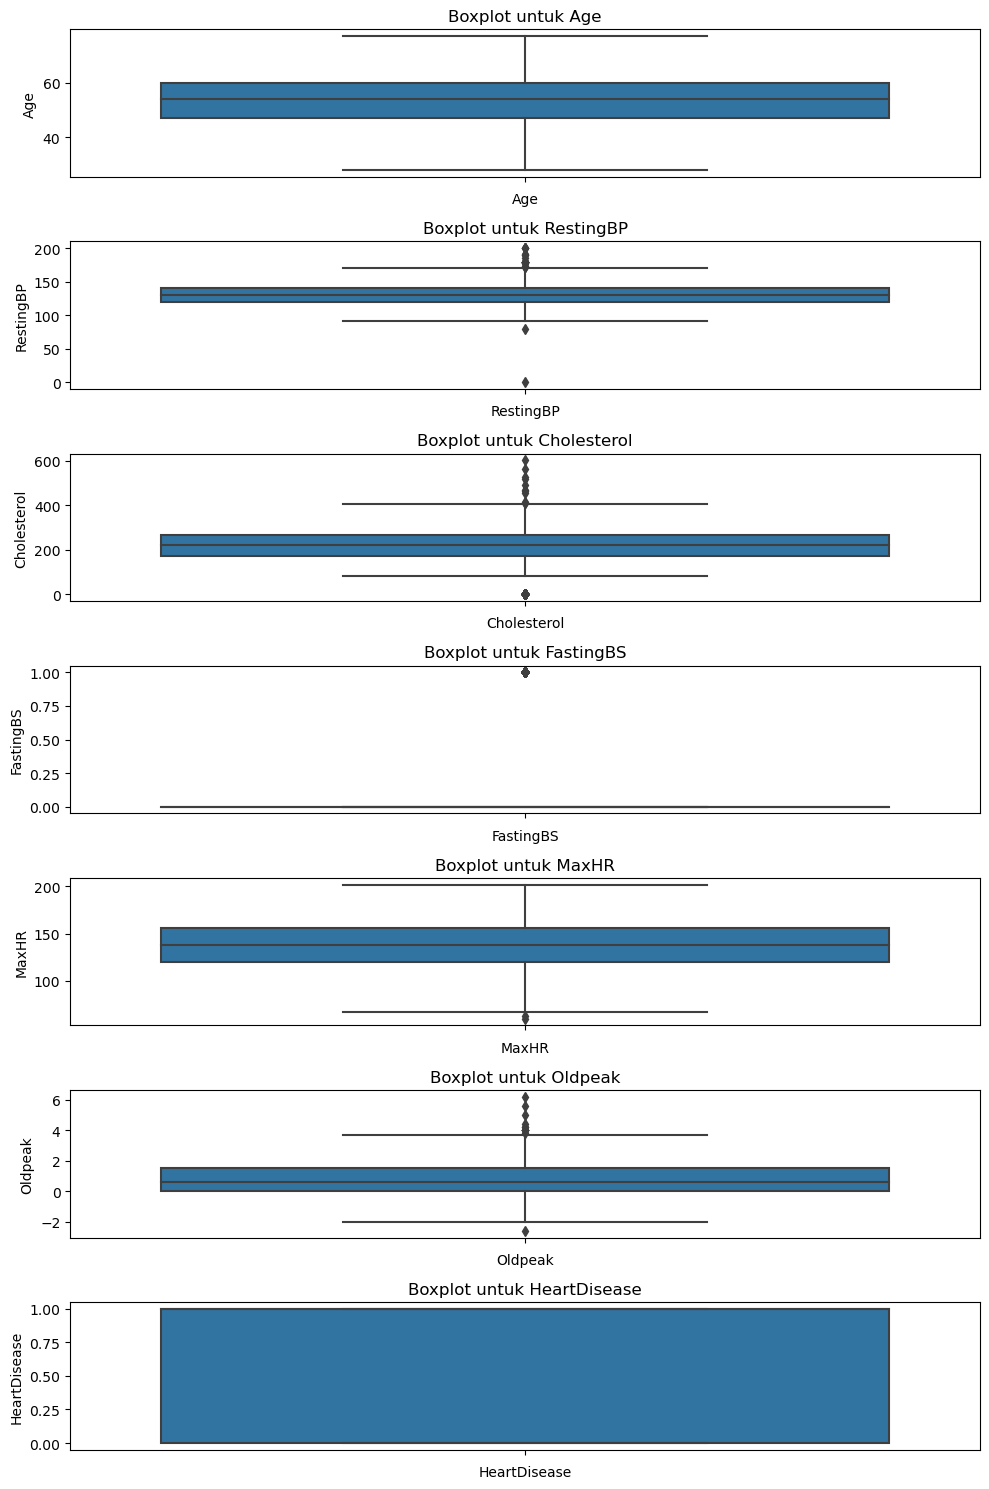

In [10]:
# Mendapatkan semua kolom numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot untuk {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Penjelasan :
1. Age:
Median usia berada di sekitar 55, yang menunjukkan bahwa separuh dari data memiliki nilai usia di bawah atau sama dengan 55. IQR, atau rentang antar kuartil, berada di antara sekitar 45 hingga 60. Artinya, 50% dari data usia berada di rentang ini. Whiskers menunjukkan rentang usia di luar kuartil atas dan bawah. Tidak ada outlier, jadi semua data berada di dalam rentang ini.

2. RestingBP:
Median tekanan darah istirahat berada di sekitar 130, yang menunjukkan nilai tengah dari distribusi tekanan darah. Rentang antar kuartil berada di sekitar 120 hingga 140, menunjukkan bahwa sebagian besar data (50%) terkonsentrasi di antara nilai ini. Whiskers menunjukkan rentang tekanan darah antara 90 hingga 180. Ada beberapa outlier di bawah nilai whisker bawah, menunjukkan bahwa ada individu dengan tekanan darah istirahat yang lebih rendah dari normal.

3. Cholesterol:
Median kadar kolesterol berada di sekitar 240. Rentang antar kuartil berada di sekitar 200 hingga 280, menunjukkan distribusi kadar kolesterol yang lebih terkonsentrasi di antara nilai ini. Whiskers menunjukkan rentang nilai kolesterol antara 150 hingga 350. Ada beberapa outlier yang terlihat baik di atas maupun di bawah whiskers, menunjukkan adanya individu dengan kadar kolesterol yang lebih tinggi atau lebih rendah dari mayoritas populasi.

4. FastingBS
Median dari FastingBS berada di sekitar 0. IQR untuk FastingBS sangat kecil, yang menunjukkan bahwa data FastingBS terkonsentrasi di sekitar median. Whiskers untuk FastingBS sangat pendek, yang menunjukkan bahwa tidak ada outlier yang signifikan dalam data.

5. MaxHR
Median dari MaxHR sekitar 150. IQR untuk MaxHR cukup besar, yang menunjukkan bahwa data MaxHR tersebar cukup luas di sekitar median. Whiskers untuk MaxHR agak panjang, yang menunjukkan bahwa ada beberapa data yang berada di luar IQR.

6. Oldpeak
Median dari Oldpeak sekitar 2. IQR untuk Oldpeak cukup kecil, yang menunjukkan bahwa data Oldpeak terkonsentrasi di sekitar median. Whiskers untuk Oldpeak agak panjang, yang menunjukkan bahwa ada beberapa data yang berada di luar IQR.

7. HeartDisease
Median dari HeartDisease sekitar 0.75. IQR untuk HeartDisease sangat kecil, yang menunjukkan bahwa data HeartDisease terkonsentrasi di sekitar median. Whiskers untuk HeartDisease sangat pendek, yang menunjukkan bahwa tidak ada outlier yang signifikan dalam data.

# Transformasi Data

Pada kolom 'RestingBP, Cholesterol, MaxHR, dan Oldpeak' dalam dataset 'data' dilakukan Scaling menggunakan StandardScaler dari library sklearn, kemudian menampilkan histogram dari data sebelum dan sesudah scaling 

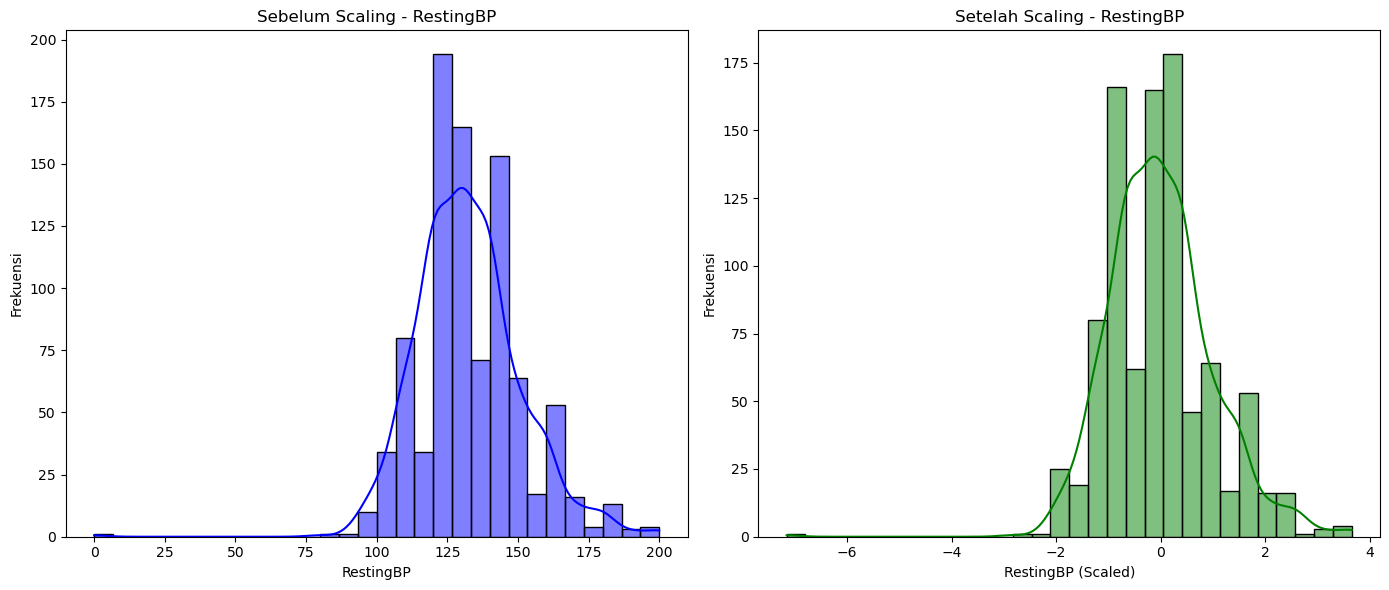

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Menangani nilai hilang pada kolom 'RestingBP' (jika ada, meski tidak terdeteksi dari info)
# Mengisi nilai hilang dengan rata-rata (jika ada)
if data['RestingBP'].isnull().any():
    data['RestingBP'].fillna(data['RestingBP'].mean(), inplace=True)

# Melakukan scaling pada kolom 'RestingBP'
scaler = StandardScaler()
data['RestingBP_scaled'] = scaler.fit_transform(data[['RestingBP']])

# Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi sebelum scaling
plt.subplot(1, 2, 1)
sns.histplot(data['RestingBP'], bins=30, kde=True, color='blue')
plt.title('Sebelum Scaling - RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frekuensi')

# Visualisasi setelah scaling
plt.subplot(1, 2, 2)
sns.histplot(data['RestingBP_scaled'], bins=30, kde=True, color='green')
plt.title('Setelah Scaling - RestingBP')
plt.xlabel('RestingBP (Scaled)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



Distribusi data RestingBP sebelum scaling memiliki rentang yang lebih luas, dengan nilai maksimum sekitar 200. sedangkan, distribusi data RestingBP_scaled sesudah scaling memiliki rentang yang lebih sempit, dengan nilai maksimum sekitar 4

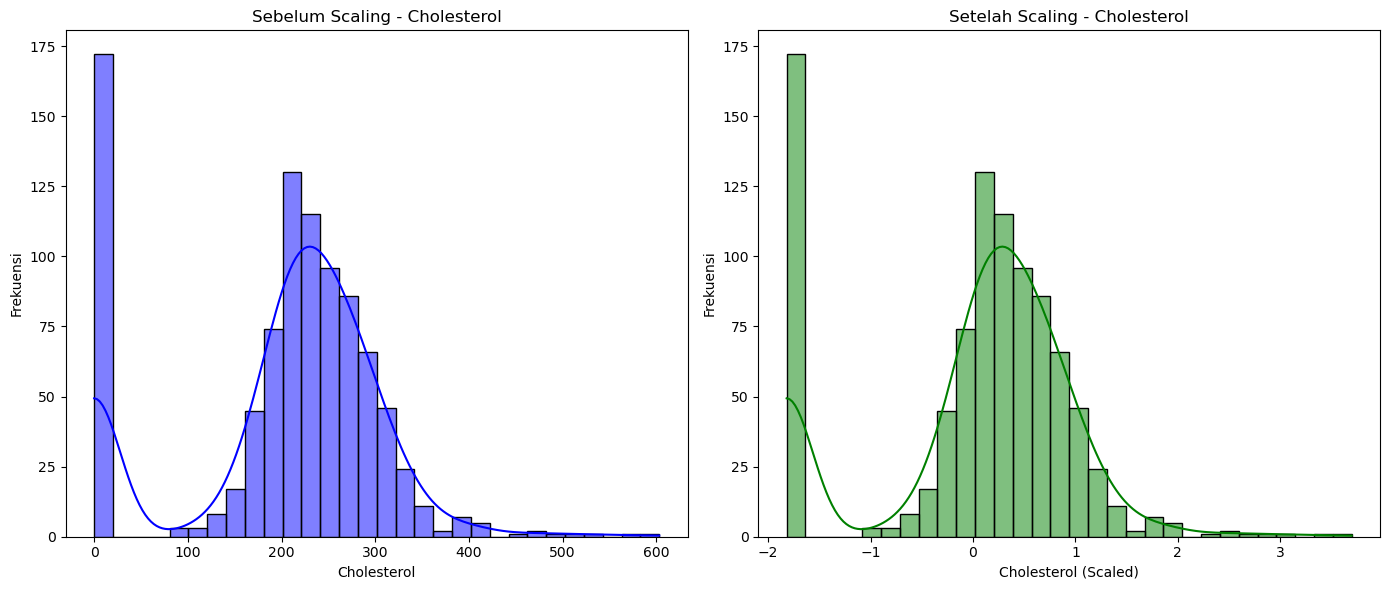

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Menangani nilai hilang pada kolom 'Cholesterol' (jika ada, meski tidak terdeteksi dari info)
# Mengisi nilai hilang dengan rata-rata (jika ada)
if data['Cholesterol'].isnull().any():
    data['Cholesterol'].fillna(data['Cholesterol'].mean(), inplace=True)

# Melakukan scaling pada kolom 'Cholesterol'
scaler = StandardScaler()
data['Cholesterol_scaled'] = scaler.fit_transform(data[['Cholesterol']])

# Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi sebelum scaling
plt.subplot(1, 2, 1)
sns.histplot(data['Cholesterol'], bins=30, kde=True, color='blue')
plt.title('Sebelum Scaling - Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frekuensi')

# Visualisasi setelah scaling
plt.subplot(1, 2, 2)
sns.histplot(data['Cholesterol_scaled'], bins=30, kde=True, color='green')
plt.title('Setelah Scaling - Cholesterol')
plt.xlabel('Cholesterol (Scaled)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



Distribusi data Choleterol sebelum scaling memiliki rentang yang lebih luas, dengan nilai maksimum sekitar 600. sedangkan, distribusi data Choleterol_scaled sesudah scaling memiliki rentang yang lebih sempit, dengan nilai maksimum sekitar 3

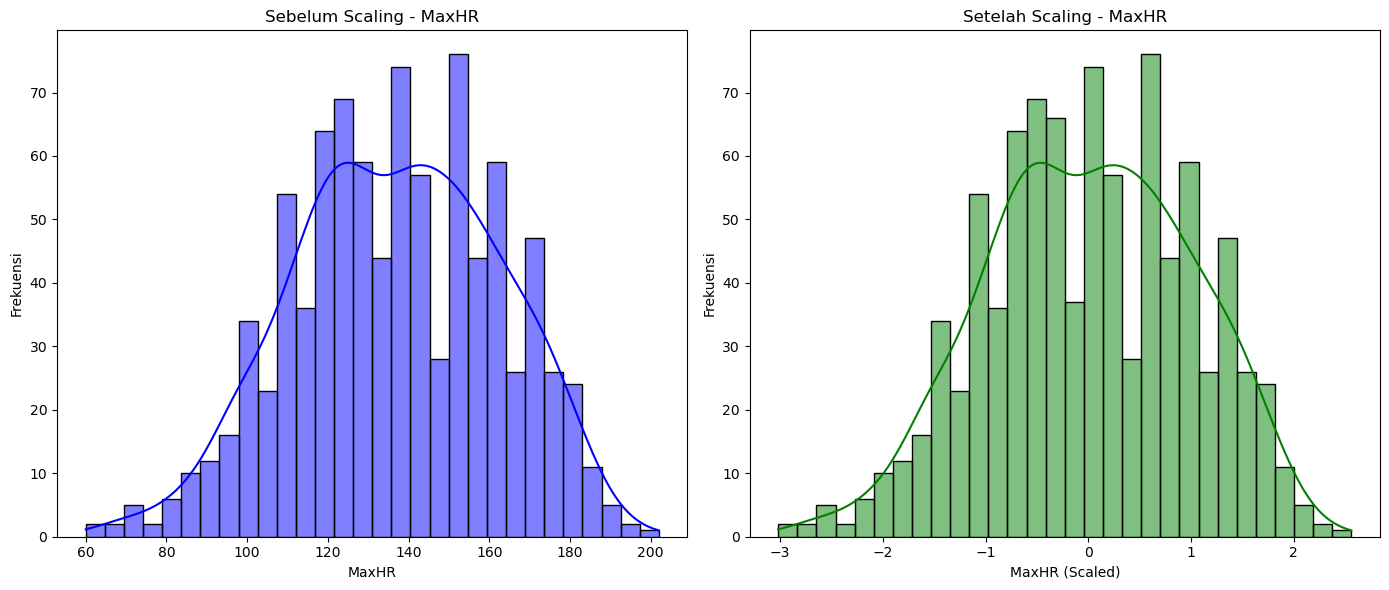

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Menangani nilai hilang pada kolom 'MaxHR' (jika ada, meski tidak terdeteksi dari info)
# Mengisi nilai hilang dengan rata-rata (jika ada)
if data['MaxHR'].isnull().any():
    data['MaxHR'].fillna(data['MaxHR'].mean(), inplace=True)

# Melakukan scaling pada kolom 'MaxHR'
scaler = StandardScaler()
data['MaxHR_scaled'] = scaler.fit_transform(data[['MaxHR']])

# Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi sebelum scaling
plt.subplot(1, 2, 1)
sns.histplot(data['MaxHR'], bins=30, kde=True, color='blue')
plt.title('Sebelum Scaling - MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frekuensi')

# Visualisasi setelah scaling
plt.subplot(1, 2, 2)
sns.histplot(data['MaxHR_scaled'], bins=30, kde=True, color='green')
plt.title('Setelah Scaling - MaxHR')
plt.xlabel('MaxHR (Scaled)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



Distribusi data MaxHR sebelum scaling memiliki rentang yang lebih luas, dengan nilai maksimum sekitar 200. sedangkan, distribusi data MaxHR_scaled sesudah scaling memiliki rentang yang lebih sempit, dengan nilai maksimum sekitar 2.

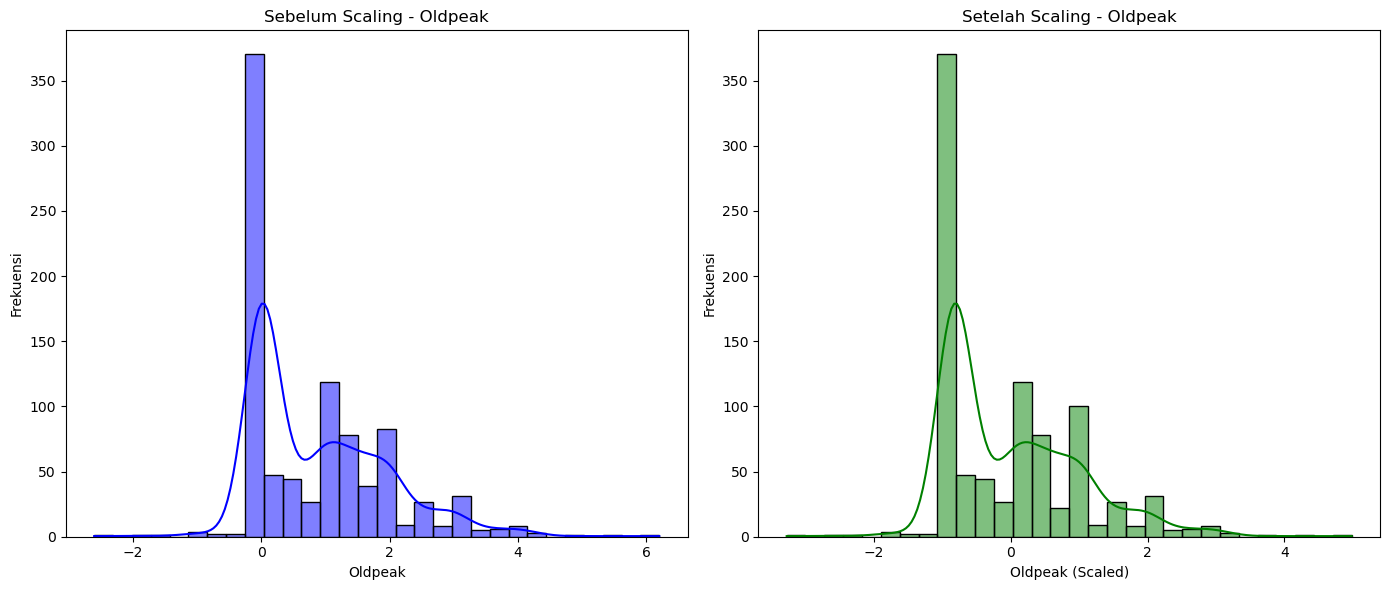

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Menangani nilai hilang pada kolom 'Oldpeak' (jika ada, meski tidak terdeteksi dari info)
# Mengisi nilai hilang dengan rata-rata (jika ada)
if data['Oldpeak'].isnull().any():
    data['Oldpeak'].fillna(data['Oldpeak'].mean(), inplace=True)

# Melakukan scaling pada kolom 'Oldpeak'
scaler = StandardScaler()
data['Oldpeak_scaled'] = scaler.fit_transform(data[['Oldpeak']])

# Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi sebelum scaling
plt.subplot(1, 2, 1)
sns.histplot(data['Oldpeak'], bins=30, kde=True, color='blue')
plt.title('Sebelum Scaling - Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frekuensi')

# Visualisasi setelah scaling
plt.subplot(1, 2, 2)
sns.histplot(data['Oldpeak_scaled'], bins=30, kde=True, color='green')
plt.title('Setelah Scaling - Oldpeak')
plt.xlabel('Oldpeak (Scaled)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



Distribusi data Oldpeak sebelum scaling memiliki rentang yang lebih luas, dengan nilai maksimum sekitar 6. Sedangkan, distribusi data Oldpeak_scaled sesudah scaling memiliki rentang yang lebih sempit, dengan nilai maksimum sekitar 4.